In [5]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [21]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str
    personality: str

def asking_age(state: AgentState)->AgentState:
    """Asking a person His age"""
    state["personality"] = f" My name is {state['name']} and I am {state['age']} years old. "
    return state
def  experience(state: AgentState) -> AgentState:
    """Asking skills the know """
    state["personality"] = f"I have an  experience in the following languages:" + ", ".join(state["skills"]) +"."
    return state
def decide_next_node(state: AgentState) -> AgentState:
    "This node decide which node to follow"
    
    if state["age"] < 15:
        return "under_age"
    return "acceptable"
        

In [22]:
graph = StateGraph(AgentState)
graph.add_node("age_node", asking_age)
graph.add_node("experience_node", experience)
graph.add_node("router", lambda state: state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router", decide_next_node,
    {
        "under_age": "age_node",
        "acceptable": "experience_node"
    }
)
graph.add_edge("age_node", END)
graph.add_edge("experience_node", END)
app = graph.compile()

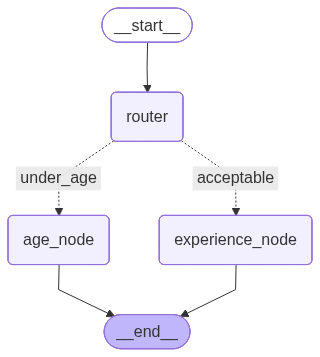

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
initial_state = {"name": "Mye", "age": 15, "skills": ["CSS", "Python", "Javascript", "SQL", "Postgress"]}
updated_state = app.invoke(initial_state)
print(updated_state["personality"])


I have an  experience in the following languages:CSS, Python, Javascript, SQL, Postgress.
